In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso,Ridge

# Toyota Corolla Dataset

In [3]:
fileloc = './ToyotaCorolla.csv'
toyota = pd.read_csv(fileloc) #read the file

### Data Pre-processing:

In [4]:
toyota= toyota.drop(['Id','Model'], axis = 1) #dropping the first four columns

In [5]:
toyota['Fuel_Type'].replace(['CNG', 'Diesel','Petrol'],
                        [0, 1, 2], inplace=True)

toyota['Color'].replace(['Beige', 'Black','Blue','Green','Grey','Red','Silver','Violet','White','Yellow'],
                        [0, 1,2,3,4,5,6,7,8,9], inplace=True)
toyota.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,2002,46986,1,90,1,2,0,...,1,1,0,0,0,1,0,0,0,0
1,13750,23,10,2002,72937,1,90,1,6,0,...,0,1,0,0,0,1,0,0,0,0
2,13950,24,9,2002,41711,1,90,1,2,0,...,0,1,0,0,0,1,0,0,0,0
3,14950,26,7,2002,48000,1,90,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,13750,30,3,2002,38500,1,90,0,1,0,...,1,1,0,1,0,1,0,0,0,0


In [6]:
toyota.isnull().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [7]:
toyotaStd= StandardScaler()
toyotaStd.fit(toyota)
toyotaScaled =toyotaStd.transform(toyota)
columns_names=toyota.columns

In [8]:
toyotaScaled =pd.DataFrame(toyotaScaled,columns=columns_names)
toyotaScaled.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,0.763763,-1.771966,1.327576,1.541796,-0.574695,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,...,0.882853,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.052852,-0.620293
1,0.832715,-1.771966,1.327576,1.541796,0.117454,-2.337868,-0.768042,0.694219,1.461923,-0.242893,...,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.052852,-0.620293
2,0.887877,-1.718184,1.029329,1.541796,-0.715386,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,...,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.052852,-0.620293
3,1.163685,-1.610620,0.432833,1.541796,-0.547650,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,...,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.052852,-0.620293
4,0.832715,-1.395491,-0.760158,1.541796,-0.801028,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,...,0.882853,0.15097,-0.41387,1.700470,-0.654871,0.546235,-0.507388,-0.412716,-0.052852,-0.620293


In [9]:
toyotaScaledX = toyotaScaled.drop('Price',axis=1,inplace=False)
toyotaScaledY = toyotaScaled['Price'].values

toyotaX_train, toyotaX_test, toyotay_train, toyotay_test = train_test_split(toyotaScaledX, toyotaScaledY, test_size=.25,random_state=1)

## 1) Simple Model (1 variable)

In [10]:
# Define X and y using the airfares Data
toyota_SimpleX_train = toyotaX_train[['Boardcomputer']].values
toyota_SimpleY_train = toyotay_train
toyota_SimpleX_test = toyotaX_test[['Boardcomputer']].values
toyota_SimpleY_test = toyotay_test

In [11]:
toyotaModel1 = LinearRegression()
toyotaModel1.fit(toyota_SimpleX_train, toyota_SimpleY_train)

LinearRegression()

In [12]:
toyotaModel1.score(toyota_SimpleX_train, toyota_SimpleY_train)

0.33367768588728397

In [13]:
toyotaModel1.score(toyota_SimpleX_test, toyota_SimpleY_test)

0.44279372715215637

In [14]:
print("Beta1 =", toyotaModel1.coef_)

Beta1 = [0.57508366]


In [15]:
print("Beta0 =", toyotaModel1.intercept_)

Beta0 = -0.004381412053505673


Comments:

The independent variable 'Boardcomputer' was chosen after testing all independent variables for the one that gave the highest score (R-squared) in the above code lines. 

A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error. Here in this case, both training and testing data have low R-squared scores . which means the errors are high. When both the training and testing errors are high, the model is UNDERFITTING.

## 2) Medium Complexity  Model (2 or 3 variables)

In [16]:
# Define X and y using the airfares Data
toyota_MediumX_train = toyotaX_train[['KM','Weight','Boardcomputer']].values
toyota_MediumY_train = toyotay_train
toyota_MediumX_test = toyotaX_test[['KM','Weight','Boardcomputer']].values
toyota_MediumY_test = toyotay_test

In [17]:
toyotaModel2 = LinearRegression()
toyotaModel2.fit(toyota_MediumX_train, toyota_MediumY_train)

LinearRegression()

In [18]:
toyotaModel2.score(toyota_MediumX_train, toyota_MediumY_train)

0.7065984986885141

In [19]:
toyotaModel2.score(toyota_MediumX_test, toyota_MediumY_test)

0.7669460212532403

In [20]:
print("Beta1, Beta2, Beta3 =", toyotaModel2.coef_)

Beta1, Beta2, Beta3 = [-0.45716623  0.47182111  0.29953465]


In [21]:
print("Beta0 = ", toyotaModel2.intercept_)

Beta0 =  -0.0064307264624116865


Comments:

In both training and testing, the R-Squared values have considerably increased from the Simple Model (model-1) with single explanatory variable to Medium model( model 2) with more than one explanatory variables. This suggests that the training and testing errors have also reduced from model 1 to model 2. In other words, by increasing the number of variables, the underfitting problem was reduced from model 1 to model 2, therefore the performance is better. But the testing accuracy is higher than the training accuracy, which means that the model is not overfitting and hence there is still scope of adding more variables to the model even better.


In model 1, we took just one variable 'Boardcomputer' with the parameter estimate (or co-efficient) as 0.57. In model 2, the co-effecient of 'Boardcomputer' has weightage decreased to 0.29 when taken along with other relevant variables.


Let us consider the independent variable 'Weight' that's included in the model. The parameter estimate or the co-efficient of this variable is 0.47 This means it has a positive impact on the Price(dependent variable), i.e, if the weight of the toyota car model is higher, the price of the car is likely to be higher. The logical explanation to this could be because heavier engines might correspond to more number of engines or higher quality equipment (factors that could increase the mileage), hence making the car prices too go up. 

## 3) Lasso Model (all variables)


In [22]:
toyota_LassoX = toyotaScaled[['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP','Met_Color', 'Color', 'Automatic',
                    'CC', 'Doors', 'Cylinders', 'Gears','Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
                    'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 
                    'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering','Radio', 'Mistlamps','Sport_Model',
                    'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Parking_Assistant', 'Tow_Bar']].values

toyota_LassoY = toyotaScaled['Price'].values

In [23]:
toyotaModel3 = Lasso(alpha=0.03)
toyotaModel3.fit(toyota_LassoX, toyota_LassoY)

Lasso(alpha=0.03)

In [24]:
# define model evaluation method
CrossValidation3 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores3 = cross_val_score(toyotaModel3, toyota_LassoX, toyota_LassoY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation3)
print(' Mean MAPE: %.3f' % (np.mean(scores3)))

 Mean MAPE: -1.135


In [25]:
toyotaModel3.score(toyota_LassoX, toyota_LassoY)

0.8943508354161968

In [26]:
print("Betas =", toyotaModel3.coef_)

Betas = [-0.10530964  0.          0.48282892 -0.16622966  0.          0.06661109
  0.         -0.          0.         -0.          0.          0.
  0.          0.00985113  0.17850567  0.01178352  0.01246426  0.01540669
 -0.          0.         -0.          0.01091543  0.15138309  0.
  0.          0.          0.04121983 -0.         -0.          0.
  0.01017442  0.          0.00075756 -0.         -0.         -0.        ]


In [27]:
print("Beta0 =", toyotaModel3.intercept_)

Beta0 = -1.6707081465722428e-15


By using the Lasso method, we get the coefficients of the following independent variables to be zero and can be dropped from the model.

Mfg_Month, Fuel_Type,'Met_Color', 'Color', 'Automatic, 'CC', 'Doors', 'Cylinders', 'Gears, 'ABS', 'Airbag_1', 'Airbag_2','Automatic_airco', 'Boardcomputer, CD_Player', 'Central_Lock', 'Powered_Window, Power_Steering','Radio,'Metallic_Rim', 'Radio_cassette','Parking_Assistant', 'Tow_Bar'
                 

This could be because of two reasons: (i) some of these variables are umimportant in determining the value of the dependent variable (ii) they are being explained by other variables that have non-zero weights and share a multi-collinearity with these dropped independent variables. 

## 4) Models Comparision

In [28]:
toyota_SimpleX = toyotaScaled[['Boardcomputer']].values
toyota_SimpleY = toyotaScaled['Price'].values
toyota_MediumX = toyotaScaled[['KM','Weight','Boardcomputer']].values
toyota_MediumY = toyotaScaled['Price'].values

In [29]:
toyotaMAPE_Model1 = cross_val_score(toyotaModel1, toyota_SimpleX, toyota_SimpleY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation3)
toyotaMAPE_Model2 = cross_val_score(toyotaModel2, toyota_MediumX, toyota_MediumY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation3)
toyotaMAPE_Model3 = cross_val_score(toyotaModel3, toyota_LassoX, toyota_LassoY, scoring='neg_mean_absolute_percentage_error', cv=CrossValidation3)

In [30]:
print('MAPE of Simple Model: %.3f' % (np.mean(toyotaMAPE_Model1)))
print('MAPE of Medium Complexity Model: %.3f' % (np.mean(toyotaMAPE_Model2)))
print('MAPE of Lasso Model: %.3f' % (np.mean(toyotaMAPE_Model3)))
print('\n Lasso Model gives the least error out of all the three models. ')

MAPE of Simple Model: -3.189
MAPE of Medium Complexity Model: -2.055
MAPE of Lasso Model: -1.135

 Lasso Model gives the least error out of all the three models. 


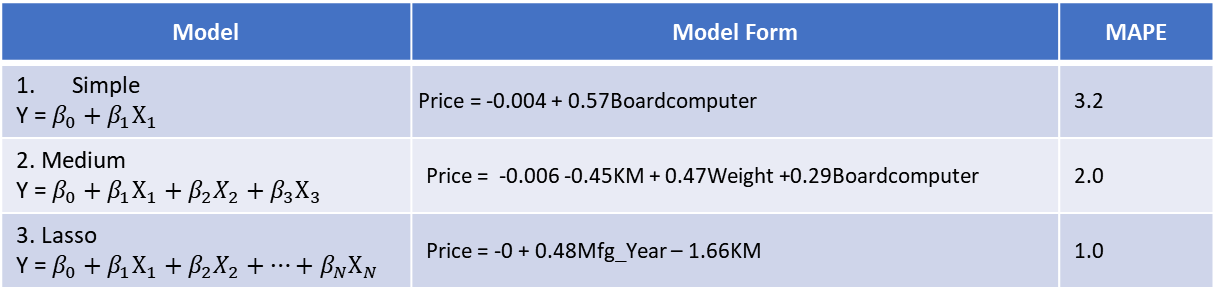